<a href="https://colab.research.google.com/github/AlessiaLeoFolliero/Practicing-with-python-/blob/main/Lefthanded_Datacamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
# load the data
data_url_1 = "https://gist.githubusercontent.com/mbonsma/8da0990b71ba9a09f7de395574e54df1/raw/aec88b30af87fad8d45da7e774223f91dad09e88/lh_data.csv"
lefthanded_data =  pd.read_csv(data_url_1)


In [4]:
lefthanded_data

,Age,Male,Female
0,10,12.717558,12.198041
1,11,15.318830,11.144804
2,12,14.808281,11.549240
3,13,13.793744,11.276442
4,14,15.156304,11.572906
...,...,...,...
72,82,7.350204,4.874899
73,83,6.471204,5.672536
74,84,6.510858,5.774881
75,85,7.337968,7.051459


Text(0, 0.5, 'Male')

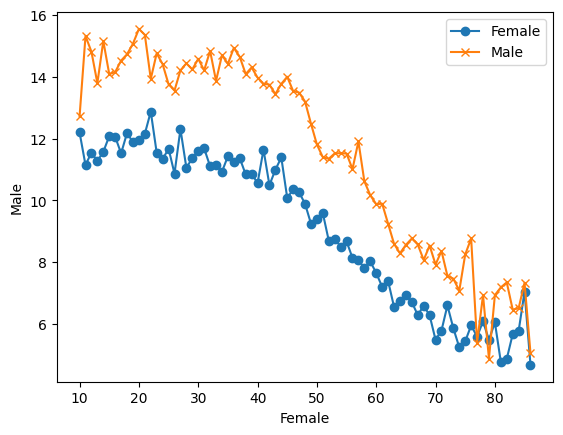

In [5]:
# plot male and female left-handedness rates vs. age
%matplotlib inline
fig, ax = plt.subplots() # create figure and axis objects
ax.plot("Age","Female", data=lefthanded_data, marker = 'o') # plot "Female" vs. "Age"
ax.plot("Age","Male", data=lefthanded_data, marker = 'x') # plot "Male" vs. "Age"
ax.legend(loc="best") # add a legend
ax.set_xlabel("Female")
ax.set_ylabel("Male")

2. Rates of left-handedness over time
Let's convert this data into a plot of the rates of left-handedness as a function of the year of birth, and average over male and female to get a single rate for both sexes.

Since the study was done in 1986, the data after this conversion will be the percentage of people alive in 1986 who are left-handed as a function of the year they were born.

Text(0, 0.5, 'Birth_year')

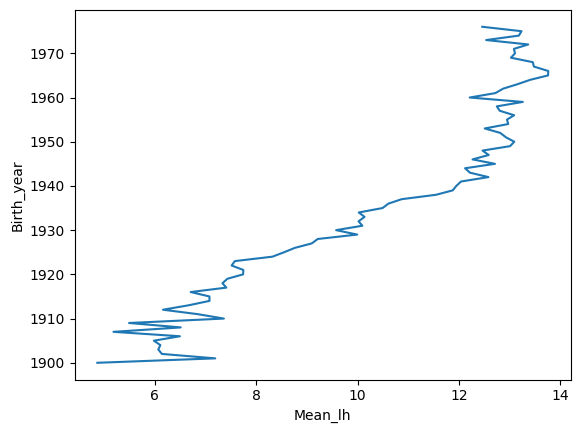

In [6]:
# create a new column for birth year of each age
# ... YOUR CODE FOR TASK 2 ...
lefthanded_data['Birth_year']=1986- lefthanded_data['Age']

# create a new column for the average of male and female
# ... YOUR CODE FOR TASK 2 ...
col = lefthanded_data.loc[: , "Male":"Female"]
lefthanded_data['Mean_lh']=col.mean(axis=1)

# create a plot of the 'Mean_lh' column vs. 'Birth_year'
fig, ax = plt.subplots()
ax.plot('Mean_lh', 'Birth_year', data=lefthanded_data) # plot 'Mean_lh' vs. 'Birth_year'
ax.set_xlabel('Mean_lh') # set the x label for the plot
ax.set_ylabel('Birth_year') # set the y label for the plot

In [7]:
lefthanded_data['Birth_year']

0     1976
1     1975
2     1974
3     1973
4     1972
      ... 
72    1904
73    1903
74    1902
75    1901
76    1900
Name: Birth_year, Length: 77, dtype: int64

In [8]:
lefthanded_data['Mean_lh']

0     12.457800
1     13.231817
2     13.178760
3     12.535093
4     13.364605
        ...    
72     6.112551
73     6.071870
74     6.142870
75     7.194713
76     4.870168
Name: Mean_lh, Length: 77, dtype: float64

In [9]:
col

,Male,Female
0,12.717558,12.198041
1,15.318830,11.144804
2,14.808281,11.549240
3,13.793744,11.276442
4,15.156304,11.572906
...,...,...
72,7.350204,4.874899
73,6.471204,5.672536
74,6.510858,5.774881
75,7.337968,7.051459


**3. Applying Bayes' rule**
The probability of dying at a certain age given that you're left-handed is not equal to the probability of being left-handed given that you died at a certain age. This inequality is why we need Bayes' theorem, a statement about conditional probability which allows us to update our beliefs after seeing evidence.

We want to calculate the probability of dying at age A given that you're left-handed. Let's write this in shorthand as P(A | LH). We also want the same quantity for right-handers: P(A | RH).

Here's Bayes' theorem for the two events we care about: left-handedness (LH) and dying at age A.

P(A|LH)=P(LH|A)P(A)P(LH)
𝑃
(
𝐴
|
𝐿
𝐻
)
=
𝑃
(
𝐿
𝐻
|
𝐴
)
𝑃
(
𝐴
)
𝑃
(
𝐿
𝐻
)

P(LH | A) is the probability that you are left-handed given that you died at age A. P(A) is the overall probability of dying at age A, and P(LH) is the overall probability of being left-handed. We will now calculate each of these three quantities, beginning with P(LH | A).

To calculate P(LH | A) for ages that might fall outside the original data, we will need to extrapolate the data to earlier and later years. Since the rates flatten out in the early 1900s and late 1900s, we'll use a few points at each end and take the mean to extrapolate the rates on each end. The number of points used for this is arbitrary, but we'll pick 10 since the data looks flat-ish until about 1910.

In [10]:
# import library
# ... YOUR CODE FOR TASK 3 ...
import numpy as np


# create a function for P(LH | A)
def P_lh_given_A(ages_of_death, study_year = 1990):
    """ P(Left-handed | ages of death), calculated based on the reported rates of left-handedness.
    Inputs: numpy array of ages of death, study_year
    Returns: probability of left-handedness given that subjects died in `study_year` at ages `ages_of_death` """

    # Use the mean of the 10 last and 10 first points for left-handedness rates before and after the start
    early_1900s_rate = lefthanded_data['Mean_lh'][-10:].mean()
    late_1900s_rate = lefthanded_data['Mean_lh'][:11].mean()
    middle_rates = lefthanded_data[lefthanded_data['Birth_year'].isin(study_year - ages_of_death)]['Mean_lh']
    youngest_age = study_year - 1986 + 10 # the youngest age is 10
    oldest_age = study_year - 1986 + 86 # the oldest age is 86

    P_return = np.zeros(ages_of_death.shape) # create an empty array to store the results
    # extract rate of left-handedness for people of ages 'ages_of_death'
    P_return[ages_of_death > oldest_age] = early_1900s_rate / 100
    P_return[ages_of_death < youngest_age] = late_1900s_rate / 100
    P_return[np.logical_and((ages_of_death <= oldest_age), (ages_of_death >= youngest_age))] = middle_rates / 100

    return P_return

In [13]:
# Death distribution data for the United States in 1999
data_url_2 = "https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"

# load death distribution data
# ... YOUR CODE FOR TASK 4 ...
death_distribution_data =  pd.read_csv(data_url_2, sep='\t',skiprows=[1])


In [18]:
death_distribution_data['Both Sexes'].dropna(axis=0)

,Age,Both Sexes,Male,Female
0,0,27937.0,15646.0,12291.0
1,1,1989.0,1103.0,886.0
2,2,1376.0,797.0,579.0
3,3,1046.0,601.0,445.0
4,4,838.0,474.0,364.0
...,...,...,...,...
110,110,40.0,9.0,31.0
111,111,21.0,1.0,20.0
112,112,12.0,2.0,10.0
113,113,9.0,2.0,7.0


In [19]:
death_distribution_data

,Age,Both Sexes,Male,Female
0,0,27937.0,15646.0,12291.0
1,1,1989.0,1103.0,886.0
2,2,1376.0,797.0,579.0
3,3,1046.0,601.0,445.0
4,4,838.0,474.0,364.0
...,...,...,...,...
120,120,1.0,NaN,1.0
121,121,NaN,NaN,NaN
122,122,NaN,NaN,NaN
123,123,NaN,NaN,NaN


Text(0, 0.5, 'Both Sexes')

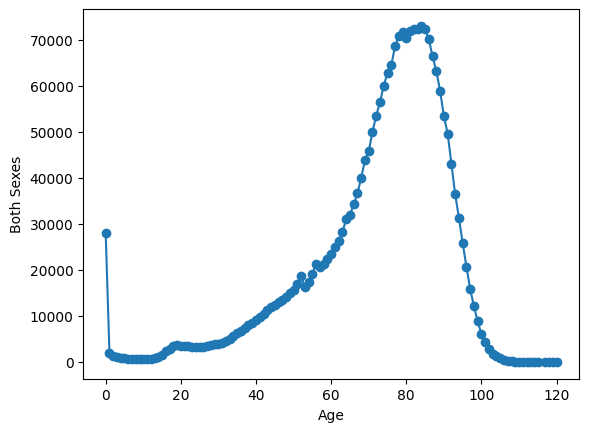

In [22]:
# Death distribution data for the United States in 1999
data_url_2 = "https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"

# load death distribution data
# ... YOUR CODE FOR TASK 4 ...
death_distribution_data =  pd.read_csv(data_url_2, sep='\t',skiprows=[1])

# drop NaN values from the `Both Sexes` column
# ... YOUR CODE FOR TASK 4 ...
death_distribution_data=death_distribution_data.dropna(subset=["Both Sexes"])

# plot number of people who died as a function of age
fig, ax = plt.subplots()
ax.plot('Age','Both Sexes', data = death_distribution_data , marker='o') # plot 'Both Sexes' vs. 'Age'
ax.set_xlabel("Age")
ax.set_ylabel("Both Sexes")

5. **The overall probability of left-handedness**

In [23]:
def P_lh(death_distribution_data, study_year = 1990): # sum over P_lh for each age group
    """ Overall probability of being left-handed if you died in the study year
    Input: dataframe of death distribution data, study year
    Output: P(LH), a single floating point number """
    p_list = death_distribution_data['Both Sexes']*P_lh_given_A(death_distribution_data['Age'], study_year) # multiply number of dead people by P_lh_given_A
    p = np.sum(p_list) # calculate the sum of p_list
    return p/np.sum(death_distribution_data['Both Sexes']) # normalize to total number of people (sum of death_distribution_data['Both Sexes'])

print(P_lh(death_distribution_data))

0.07767394048809646


In [24]:
death_distribution_data

,Age,Both Sexes,Male,Female
0,0,27937.0,15646.0,12291.0
1,1,1989.0,1103.0,886.0
2,2,1376.0,797.0,579.0
3,3,1046.0,601.0,445.0
4,4,838.0,474.0,364.0
...,...,...,...,...
115,115,3.0,NaN,3.0
117,117,3.0,2.0,1.0
118,118,1.0,NaN,1.0
119,119,2.0,NaN,2.0


 **Putting it all together: dying while left-handed (i)**

In [25]:
def P_A_given_lh(ages_of_death, death_distribution_data, study_year = 1990):
    """ The overall probability of being a particular `age_of_death` given that you're left-handed """
    P_A = death_distribution_data['Both Sexes'][ages_of_death]/np.sum(death_distribution_data['Both Sexes'])
    P_left = P_lh(death_distribution_data, study_year) # use P_lh function to get probability of left-handedness overall
    P_lh_A = P_lh_given_A(ages_of_death, study_year) # use P_lh_given_A to get probability of left-handedness for a certain age
    return P_lh_A*P_A/P_left

**Putting it all together: dying while left-handed (ii)**

In [26]:
def P_A_given_rh(ages_of_death, death_distribution_data, study_year = 1990):
    """ The overall probability of being a particular `age_of_death` given that you're right-handed """
    P_A = death_distribution_data['Both Sexes'][ages_of_death]/np.sum(death_distribution_data['Both Sexes'])
    P_right = 1-P_lh(death_distribution_data, study_year) # either you're left-handed or right-handed, so P_right = 1 - P_left
    P_rh_A = 1- P_lh_given_A(ages_of_death, study_year)# P_rh_A = 1 - P_lh_A
    return P_rh_A*P_A/P_right

**Plotting the distributions of conditional probabilities**

NameError: name 'best' is not defined

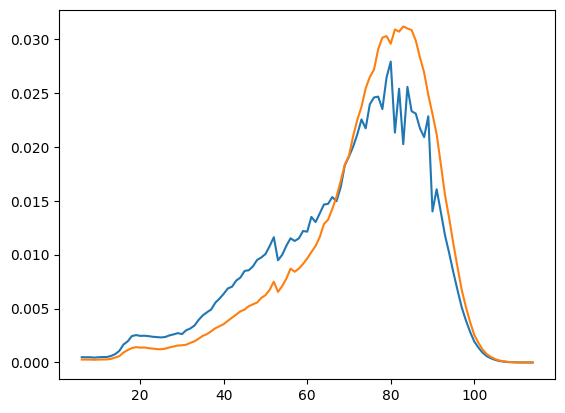

In [28]:
ages = np.arange(6, 115, 1) # make a list of ages of death to plot

# calculate the probability of being left- or right-handed for each
left_handed_probability = P_A_given_lh(ages,death_distribution_data)
right_handed_probability = P_A_given_rh(ages,death_distribution_data)

# create a plot of the two probabilities vs. age
fig, ax = plt.subplots() # create figure and axis objects
ax.plot(ages, left_handed_probability, label = "Left-handed")
ax.plot(ages, right_handed_probability, label = "Right-handed")
ax.legend() # add a legend
ax.set_xlabel("Age at death")
ax.set_ylabel(r"Probability of being age A at death")

**Moment of truth: age of left and right-handers at death**

In [29]:
# calculate average ages for left-handed and right-handed groups
# use np.array so that two arrays can be multiplied
average_lh_age =  np.nansum(ages*np.array(left_handed_probability))
average_rh_age =  np.nansum(ages*np.array(right_handed_probability))

# print the average ages for each group
# ... YOUR CODE FOR TASK 9 ...
print(average_lh_age)
print(average_rh_age)

# print the difference between the average ages
print("The difference in average ages is " + str(round(average_lh_age - average_rh_age, 1)) + " years.")

67.23650200132943
72.79249863605348
The difference in average ages is -5.6 years.


**Final comments**

By considering a different time for the study year (2018) we can see a big difference in the age gap

In [30]:
# Calculate the probability of being left- or right-handed for all ages
left_handed_probability_2018 = P_A_given_lh(ages,death_distribution_data, study_year=2018)
right_handed_probability_2018 = P_A_given_rh(ages,death_distribution_data, study_year=2018)

# calculate average ages for left-handed and right-handed groups
average_lh_age_2018 = np.nansum(ages*np.array(left_handed_probability_2018))
average_rh_age_2018 = np.nansum(ages*np.array(right_handed_probability_2018))

print("The difference in average ages is " +
      str(round(average_rh_age_2018 - average_lh_age_2018, 1)) + " years.")

The difference in average ages is 2.4 years.
